<class 'pandas.core.frame.DataFrame'>


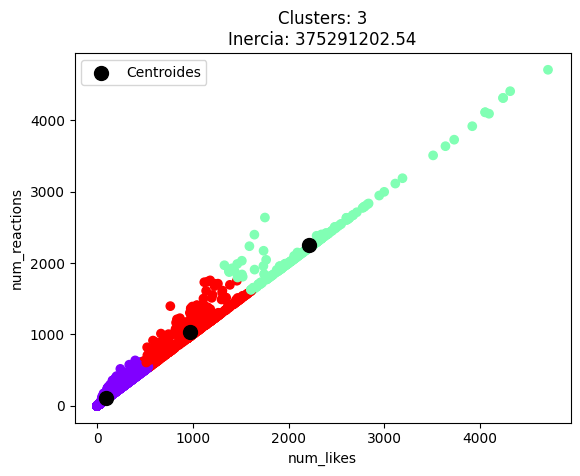

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def K_Means(data, columns, num_clusters):
    X_scaled = data[columns].values
    inertia_values = []

    def calculate_inertia(X, labels, centroids):
        inertia = 0
        for i in range(len(centroids)):
            cluster_points = X[labels == i]
            squared_distances = np.sum((cluster_points - centroids[i]) ** 2)
            inertia += squared_distances
        return inertia

    def calculate_distances(X, centroids):
        num_points = X.shape[0]
        num_clusters = centroids.shape[0]
        distances = np.zeros((num_points, num_clusters))

        for i in range(num_clusters):
            centroid = centroids[i]
            squared_distances = np.sum((X - centroid) ** 2, axis=1)
            distances[:, i] = np.sqrt(squared_distances)

        return distances

    def update_centroids(X, labels, num_clusters):
        new_centroids = np.zeros((num_clusters, X.shape[1]))
        for i in range(num_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points, axis=0)
        return new_centroids

    np.random.seed(0)
    centroids = X_scaled[np.random.choice(X_scaled.shape[0], num_clusters, replace=False)]
    max_iters = 100

    for _ in range(max_iters):
        distances = calculate_distances(X_scaled, centroids)
        labels = np.argmin(distances, axis=1)
        new_centroids = update_centroids(X_scaled, labels, num_clusters)

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    inertia = calculate_inertia(X_scaled, labels, centroids)
    inertia_values.append(inertia)

    # Visualización de los clusters
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='rainbow')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', label='Centroides')
    plt.title(f'Clusters: {num_clusters}\nInercia: {inertia:.2f}')
    plt.legend()
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.show()

archivo_csv = 'live.csv'  
data = pd.read_csv(archivo_csv)
columnas_a_eliminar = ['Column1', 'Column2', 'Column3', 'Column4']
data = data.drop(columns=columnas_a_eliminar)
print(type(data))
num_clusters = 3
K_Means(data, ['num_likes', 'num_reactions'], num_clusters)